# Importing the Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import statsmodels.api as sm

# Import the Dataset

In [2]:
data = pd.read_csv(r"D:\Sem_(I)\PDS\ipl.csv")

In [3]:
data

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


# About Dataset:

###### This dataset columns indicate:
date --- The date match has happened.

venue --- place match has happened.

bat_team --- Batting team name bowlteam - Bowling team name.

batsman --- player who is facing the ball.

bowler --- player who bowls the bowl.

runs --- runs scored by batsman for that particular ball.

wickets --- Tells whether batsman out or not for that ball.

overs --- Indiactes over and the ball number in the over.

runs_last_5 --- runs in the last 5 overs.

wickets_last_5 --- wickets in the last 5 overs.

striker --- score of the striker or batsman facing the ball.

non-striker --- score of the non-striker or batsman who is opposite to batsman facing the ball.

total --- Total runs of the batting team in the match.

# Data Summarization

In [4]:
data.shape

(76014, 15)

In [5]:
data.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [7]:
data.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [8]:
data.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

#### Plot Showing that there are no missing values in my table:

AxesSubplot(0.125,0.125;0.698618x0.755)


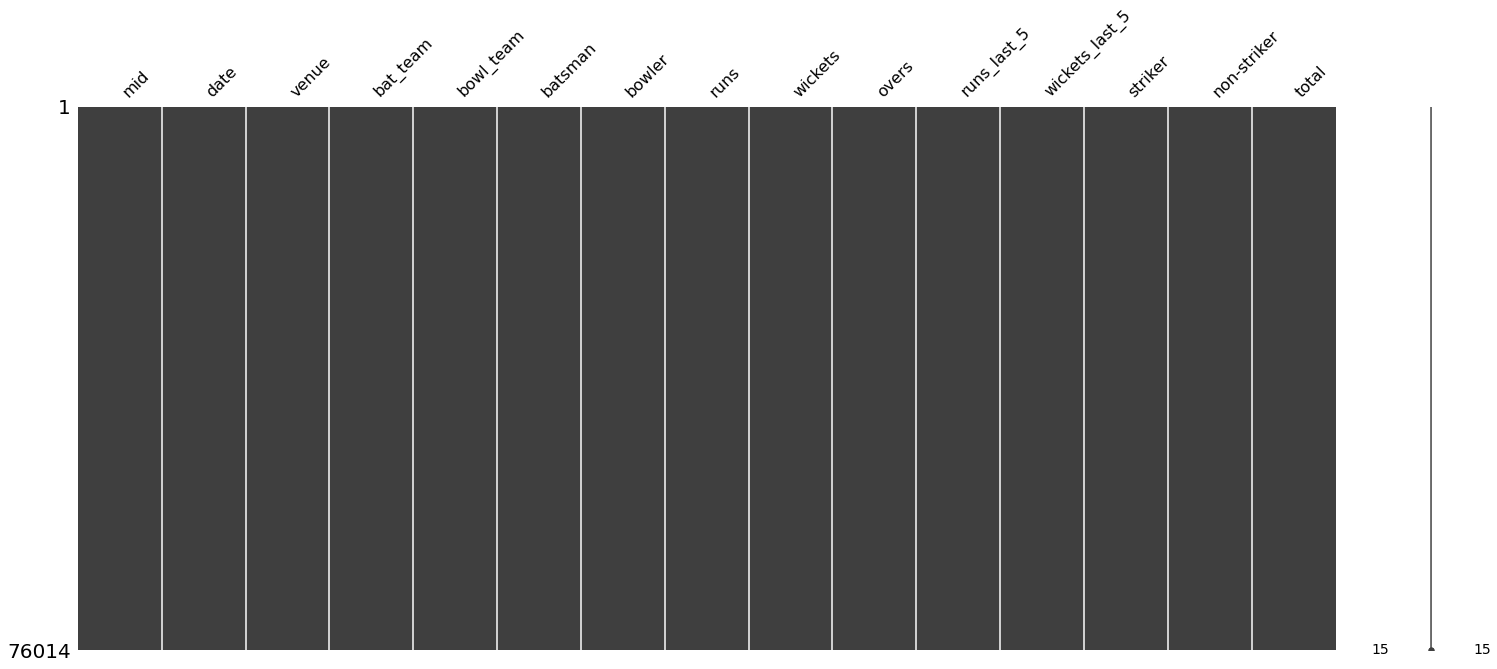

In [9]:
print(msno.matrix(data))

# Preprocessing Data to the requirements

#### Removing the unwanted data

In [10]:
col_remove = ['mid', 'striker', 'non-striker', 'batsman', 'bowler', 'date']
print(f'Before removing unwanted columns: {data.shape}')
ndata = data.drop(labels=col_remove, axis=1)
print(f'After removing unwanted columns: {ndata.shape}')

Before removing unwanted columns: (76014, 15)
After removing unwanted columns: (76014, 9)


In [11]:
print(f'Before removing unwanted columns all the columns are: \n{data.columns}')
print("**********************************************************************")
print(f'After removing unwanted columns all the columns are: \n{ndata.columns}')

Before removing unwanted columns all the columns are: 
Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')
**********************************************************************
After removing unwanted columns all the columns are: 
Index(['venue', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')


In [12]:
print("Total unique entries in the column *bat_team* are:\n", ndata['bat_team'].unique())
print("**********************************************************************")
print("Total unique entries in the column *bowl_team* are:\n", ndata['bowl_team'].unique())

Total unique entries in the column *bat_team* are:
 ['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Deccan Chargers' 'Kings XI Punjab'
 'Royal Challengers Bangalore' 'Delhi Daredevils' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant']
**********************************************************************
Total unique entries in the column *bowl_team* are:
 ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Kolkata Knight Riders' 'Rajasthan Royals' 'Mumbai Indians'
 'Chennai Super Kings' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant']


In [13]:
# Replacing the data of Deccan Chargers to Sunrisers Hyderabad:

ndata['bat_team'] = ndata['bat_team'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
ndata['bowl_team'] = ndata['bowl_team'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')


#  Replacing the data of Rising Pune Supergiants to Rising Pune Supergiant:

ndata['bat_team'] = ndata['bat_team'].str.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
ndata['bowl_team'] = ndata['bowl_team'].str.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')

In [14]:
print("After replacing duplicate entries total unique entries in the column *bat_team* are:\n", ndata['bat_team'].unique())
print("**********************************************************************")
print("After replacing duplicate entries total unique entries in the column *bowl_team* are:\n", ndata['bowl_team'].unique())

After replacing duplicate entries total unique entries in the column *bat_team* are:
 ['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Sunrisers Hyderabad' 'Kings XI Punjab'
 'Royal Challengers Bangalore' 'Delhi Daredevils' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Rising Pune Supergiant' 'Gujarat Lions']
**********************************************************************
After replacing duplicate entries total unique entries in the column *bowl_team* are:
 ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Kolkata Knight Riders' 'Rajasthan Royals' 'Mumbai Indians'
 'Chennai Super Kings' 'Sunrisers Hyderabad' 'Pune Warriors'
 'Kochi Tuskers Kerala' 'Rising Pune Supergiant' 'Gujarat Lions']


In [15]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians','Kings XI Punjab','Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

In [16]:
# Keeping only consistent teams

print(f'Before removing inconsistent teams: {ndata.shape}')
rndata = ndata[(data['bat_team'].isin(consistent_teams)) & (data['bowl_team'].isin(consistent_teams))]
print(f'After removing inconsistent teams: {rndata.shape}')

Before removing inconsistent teams: (76014, 9)
After removing inconsistent teams: (53811, 9)


In [17]:
# Removing first 6 overs data in every match as it is batting powerplay:

rndata = rndata[rndata['overs']>=6.0]

In [18]:
rndata['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Eden Gardens',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera',
       'Himachal Pradesh Cricket Association Stadium',
       'Subrata Roy Sahara Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Barabati Stadium', 'Maharashtra Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Punjab Cricket Association IS Bi

In [19]:
Grounds = [ 'Wankhede Stadium', 'Sharjah Cricket Stadium', 'Sheikh Zayed Stadium', 'Sardar Patel Stadium, Motera',
            'Rajiv Gandhi International Stadium, Uppal', 'Punjab Cricket Association Stadium, Mohali', 
            'Punjab Cricket Association IS Bindra Stadium, Mohali', 'M Chinnaswamy Stadium','MA Chidambaram Stadium, Chepauk',
            'Eden Gardens', 'Dubai International Cricket Stadium','Saurashtra Cricket Association Stadium',
            'Vidarbha Cricket Association Stadium, Jamtha' ]


In [20]:
# Keeping only consistent venues

print(f'Before removing inconsistent venues: {rndata.shape}')
rndata = rndata[(data['venue'].isin(Grounds))]
print(f'After removing inconsistent venues: {rndata.shape}')

Before removing inconsistent venues: (37389, 9)
After removing inconsistent venues: (23655, 9)


# Exploratory Data Analysis (EDA):

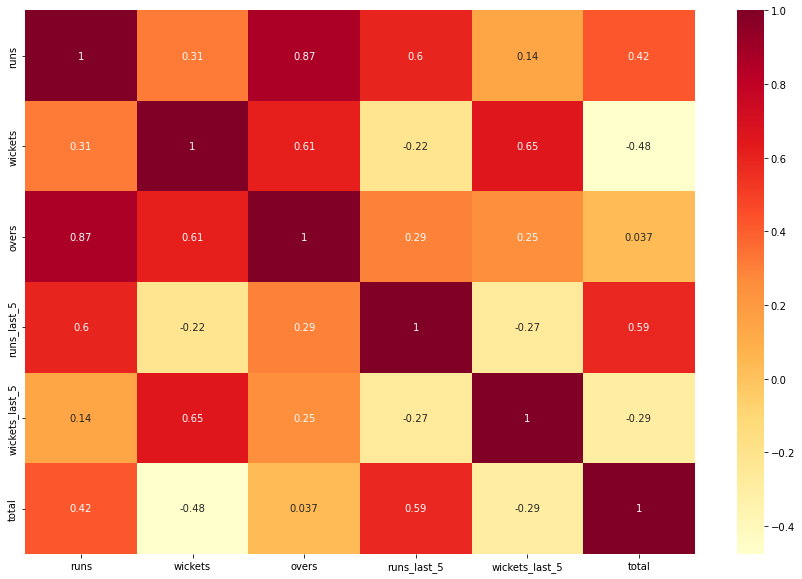

In [21]:
# visualizing correlation between columns
import matplotlib.pyplot as plt
import seaborn as sns

# Get correlation of all the features of the dataset
corr_matrix = rndata.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(15,10))
g = sns.heatmap(data=rndata[top_corr_features].corr(), annot=True, cmap='YlOrRd')

In [22]:
encode = pd.get_dummies(data=rndata, columns=['bat_team','bowl_team','venue'])
encode.columns

Index(['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total',
       'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad',
       'venue_Dubai International Cricket Stadium', 'venue_Eden Gardens',
       'venue_M Chinnaswamy Stadium', 'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Punjab Cricket Association IS Bindra Stadium, Mohali',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'ven

In [23]:
rndata.head()

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
38,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,62,1,6.1,55,1,222
39,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,63,1,6.2,52,1,222
40,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,64,1,6.3,47,1,222
41,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,66,1,6.4,45,1,222
42,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,67,1,6.5,46,1,222


In [24]:
encode.tail()

,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,...,venue_Eden Gardens,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk","venue_Punjab Cricket Association IS Bindra Stadium, Mohali","venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal","venue_Sardar Patel Stadium, Motera",venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,venue_Wankhede Stadium
75884,106,9,18.1,29,4,107,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
75885,107,9,18.2,29,4,107,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
75886,107,9,18.3,28,4,107,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
75887,107,9,18.4,24,4,107,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
75888,107,10,18.5,23,5,107,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [25]:
len(Grounds)

13

In [26]:
encode = encode[[ 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
                 
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
            
              'venue_Dubai International Cricket Stadium', 'venue_Eden Gardens','venue_M Chinnaswamy Stadium',
              'venue_MA Chidambaram Stadium, Chepauk', 'venue_Punjab Cricket Association IS Bindra Stadium, Mohali',
              'venue_Punjab Cricket Association Stadium, Mohali','venue_Rajiv Gandhi International Stadium, Uppal',
              'venue_Sardar Patel Stadium, Motera', 'venue_Sharjah Cricket Stadium', 'venue_Wankhede Stadium',
              
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]


In [27]:
encode.head()

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,"venue_Rajiv Gandhi International Stadium, Uppal","venue_Sardar Patel Stadium, Motera",venue_Sharjah Cricket Stadium,venue_Wankhede Stadium,overs,runs,wickets,runs_last_5,wickets_last_5,total
38,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,6.1,62,1,55,1,222
39,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,6.2,63,1,52,1,222
40,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,6.3,64,1,47,1,222
41,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,6.4,66,1,45,1,222
42,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,6.5,67,1,46,1,222


In [28]:
x = encode.iloc[:,:-1]
y = encode.iloc[:,-1]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(f"Training set: {x_train.shape} and Test set: {x_test.shape}")

Training set: (18924, 31) and Test set: (4731, 31)


In [29]:
x_train

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,"venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal","venue_Sardar Patel Stadium, Motera",venue_Sharjah Cricket Stadium,venue_Wankhede Stadium,overs,runs,wickets,runs_last_5,wickets_last_5
50371,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,12.3,87,2,27,0
55831,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,17.1,138,4,46,3
50361,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,10.5,75,2,31,0
45141,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,9.1,63,0,28,0
53741,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,16.6,123,6,26,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69402,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,6.6,45,2,25,2
59137,0,0,0,0,0,0,0,1,1,0,...,0,1,0,0,0,18.1,176,5,44,2
49928,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,19.6,125,7,56,2
25331,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,15.2,86,5,26,1


In [30]:
x_test

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,"venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal","venue_Sardar Patel Stadium, Motera",venue_Sharjah Cricket Stadium,venue_Wankhede Stadium,overs,runs,wickets,runs_last_5,wickets_last_5
67331,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,12.6,102,2,41,1
64149,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,16.3,107,5,30,1
4522,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,18.4,135,4,53,0
44944,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,17.6,144,4,61,1
65719,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,12.2,90,0,45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34002,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,6.5,51,0,30,0
5211,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,11.6,79,3,36,1
32791,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,12.2,78,2,29,1
29752,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,10.4,86,7,48,3


In [31]:
y_train

50371    172
55831    177
50361    172
45141    170
53741    156
        ... 
69402    157
59137    192
49928    125
25331    119
69414    157
Name: total, Length: 18924, dtype: int64

In [32]:
y_test

67331    179
64149    143
4522     156
44944    161
65719    164
        ... 
34002    190
5211     154
32791    146
29752     97
116      222
Name: total, Length: 4731, dtype: int64

### Importing Statistical functions for Regression:

In [33]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
from sklearn.metrics import r2_score, adjusted_rand_score as adj_r2_score

# Linear Regression

In [34]:
# Linear Regression - Model Evaluation

from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
print(linear_regressor.fit(x_train, y_train))

y_pred_lr = linear_regressor.predict(x_test)

print("***---- Linear Regression - Model Evaluation ----***")
print(f"Mean Absolute Error (MAE): {mae(y_test, y_pred_lr)}")
print(f"Mean Squared Error (MSE): {mse(y_test, y_pred_lr)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse(y_test, y_pred_lr))}")
print("R2 Score : %.2f" %r2_score(y_test,y_pred_lr))

LinearRegression()
***---- Linear Regression - Model Evaluation ----***
Mean Absolute Error (MAE): 12.330896753440367
Mean Squared Error (MSE): 265.5919353696402
Root Mean Squared Error (RMSE): 16.296991604883406
R2 Score : 0.71


# Logistic Regression

In [35]:
# Logistic Regression - Model Evaluation

from sklearn.linear_model import LogisticRegression

logistic_regressor = LogisticRegression(solver='liblinear')
print(logistic_regressor.fit(x_train, y_train))

y_pred_lgr = logistic_regressor.predict(x_test)

print("***---- Logistic Regression - Model Evaluation ----***")
print(f"Mean Absolute Error (MAE): {mae(y_test, y_pred_lgr)}")
print(f"Mean Squared Error (MSE): {mse(y_test, y_pred_lgr)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse(y_test, y_pred_lgr))}")
print("R2 Score : %.2f" % r2_score(y_test,y_pred_lgr))

LogisticRegression(solver='liblinear')
***---- Logistic Regression - Model Evaluation ----***
Mean Absolute Error (MAE): 5.696892834495879
Mean Squared Error (MSE): 187.41957302895793
Root Mean Squared Error (RMSE): 13.690126844881968
R2 Score : 0.80


# Decision Tree

In [36]:
# Decision Tree Regression - Model Evaluation

from sklearn.tree import DecisionTreeRegressor

decision_regressor = DecisionTreeRegressor(min_samples_leaf=.000001)
print(decision_regressor.fit(x_train,y_train))

y_pred_dt = decision_regressor.predict(x_test)

print("***---- Decision Tree Regression - Model Evaluation ----***")
print(f"Mean Absolute Error (MAE): {mae(y_test, y_pred_dt)}")
print(f"Mean Squared Error (MSE): {mse(y_test, y_pred_dt)}")
print(f"Root Mean Squared Error(RMSE): {np.sqrt(mse(y_test, y_pred_dt))}")
print("R2 score : %.2f" % r2_score(y_test,y_pred_dt))

DecisionTreeRegressor(min_samples_leaf=1e-06)
***---- Decision Tree Regression - Model Evaluation ----***
Mean Absolute Error (MAE): 1.915028535193405
Mean Squared Error (MSE): 52.53519340519975
Root Mean Squared Error(RMSE): 7.248116541916234
R2 score : 0.94


# Random Forest

In [37]:
# Random Forest Regression - Model Evaluation

from sklearn.ensemble import RandomForestRegressor

random_regressor = RandomForestRegressor()
print(random_regressor.fit(x_train, y_train))

y_pred_rf = random_regressor.predict(x_test)

print("***---- Random Forest Regression - Model Evaluation ----***")
print(f"Mean Absolute Error (MAE): {mae(y_test, y_pred_rf)}")
print(f"Mean Squared Error (MSE): {mse(y_test, y_pred_rf)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse(y_test, y_pred_rf))}")
print(f"R2 score : %.2f" % r2_score(y_test,y_pred_rf))

RandomForestRegressor()
***---- Random Forest Regression - Model Evaluation ----***
Mean Absolute Error (MAE): 2.6845048615514693
Mean Squared Error (MSE): 27.90995154529815
Root Mean Squared Error (RMSE): 5.282986990831811
R2 score : 0.97


# Pooled OLS Model: 
##### (does not take the time factor into account, and treats the data like a normal cross-sectional data)

In [38]:
pooled_olsr_model = sm.OLS(endog=y_train, exog=x_train)

pooled_olsr_model_results = pooled_olsr_model.fit()

print(pooled_olsr_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     1493.
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:58:55   Log-Likelihood:                -79891.
No. Observations:               18924   AIC:                         1.598e+05
Df Residuals:                   18894   BIC:                         1.601e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

# Gradient Boosting Regressor

In [39]:
# Gradient Boosting Regression - Model Evaluation

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import  ExtraTreesRegressor
import xgboost
from xgboost import XGBRegressor

gbr=GradientBoostingRegressor(n_estimators=10000)
print(gbr.fit(x_train,y_train))

y_pred_gbr = gbr.predict(x_test)

print("***---- Gradient Boosting Regression - Model Evaluation ----***")
print(f"Mean Absolute Error (MAE): {mae(y_test, y_pred_gbr)}")
print(f"Mean Squared Error (MSE): {mse(y_test, y_pred_gbr)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse(y_test, y_pred_gbr))}")
print(f"R2 score : %.2f" % r2_score(y_test,y_pred_gbr))

GradientBoostingRegressor(n_estimators=10000)
***---- Gradient Boosting Regression - Model Evaluation ----***
Mean Absolute Error (MAE): 4.869405922615701
Mean Squared Error (MSE): 49.945647036754934
Root Mean Squared Error (RMSE): 7.067223431925365
R2 score : 0.95


# Extra Tree Regressor

In [45]:
# Extra Trees Regression - Model Evaluation

etr=ExtraTreesRegressor(n_estimators=1000)
print(etr.fit(x_train,y_train))

y_pred_etr = etr.predict(x_test)

print("***---- Extra Trees Regression - Model Evaluation ----***")
print(f"Mean Absolute Error (MAE): {mae(y_test, y_pred_etr)}")
print(f"Mean Squared Error (MSE): {mse(y_test, y_pred_etr)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse(y_test, y_pred_etr))}")
print(f"R2 score : %.4f" % r2_score(y_test,y_pred_etr))

ExtraTreesRegressor(n_estimators=1000)
***---- Extra Trees Regression - Model Evaluation ----***
Mean Absolute Error (MAE): 1.1303501373916716
Mean Squared Error (MSE): 9.279268177393785
Root Mean Squared Error (RMSE): 3.0461891237074865
R2 score : 0.9899


# XGB Regressor

In [41]:
# XGB Regression - Model Evaluation


xgbr=XGBRegressor(n_estimators=10000)
xgbr.fit(x_train,y_train)

y_pred_xgbr = xgbr.predict(x_test)

print("***---- XGBoost Regression - Model Evaluation ----***")
print(f"Mean Absolute Error (MAE): {mae(y_test, y_pred_xgbr)}")
print(f"Mean Squared Error (MSE): {mse(y_test, y_pred_xgbr)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse(y_test, y_pred_xgbr))}")
print(f"R2 score : %.2f" % r2_score(y_test,y_pred_xgbr))

***---- XGBoost Regression - Model Evaluation ----***
Mean Absolute Error (MAE): 2.9484819183639885
Mean Squared Error (MSE): 24.26658822611737
Root Mean Squared Error (RMSE): 4.92611289214096
R2 score : 0.97


# Predictions_Function:

In [42]:
def predict_score(batting_team, bowling_team, venue, overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5):
    temp_array = list()

    # Batting Team:
    
    if batting_team == 'Chennai Super Kings':
        temp_array = temp_array + [1,0,0,0,0,0,0,0]
    elif batting_team == 'Delhi Daredevils':
        temp_array = temp_array + [0,1,0,0,0,0,0,0]
    elif batting_team == 'Kings XI Punjab':
        temp_array = temp_array + [0,0,1,0,0,0,0,0]
    elif batting_team == 'Kolkata Knight Riders':
        temp_array = temp_array + [0,0,0,1,0,0,0,0]
    elif batting_team == 'Mumbai Indians':
        temp_array = temp_array + [0,0,0,0,1,0,0,0]
    elif batting_team == 'Rajasthan Royals':
        temp_array = temp_array + [0,0,0,0,0,1,0,0]
    elif batting_team == 'Royal Challengers Bangalore':
        temp_array = temp_array + [0,0,0,0,0,0,1,0]
    elif batting_team == 'Sunrisers Hyderabad':
        temp_array = temp_array + [0,0,0,0,0,0,0,1]

    # Bowling Team:
    
    if bowling_team == 'Chennai Super Kings':
        temp_array = temp_array + [1,0,0,0,0,0,0,0]
    elif bowling_team == 'Delhi Daredevils':
        temp_array = temp_array + [0,1,0,0,0,0,0,0]
    elif bowling_team == 'Kings XI Punjab':
        temp_array = temp_array + [0,0,1,0,0,0,0,0]
    elif bowling_team == 'Kolkata Knight Riders':
        temp_array = temp_array + [0,0,0,1,0,0,0,0]
    elif bowling_team == 'Mumbai Indians':
        temp_array = temp_array + [0,0,0,0,1,0,0,0]
    elif bowling_team == 'Rajasthan Royals':
        temp_array = temp_array + [0,0,0,0,0,1,0,0]
    elif bowling_team == 'Royal Challengers Bangalore':
        temp_array = temp_array + [0,0,0,0,0,0,1,0]
    elif bowling_team == 'Sunrisers Hyderabad':
        temp_array = temp_array + [0,0,0,0,0,0,0,1]

    #venue:
    
    if venue == 'Dubai International Cricket Stadium':
        temp_array = temp_array + [1,0,0,0,0,0,0,0,0,0]
    elif venue == 'Eden Gardens':
        temp_array = temp_array + [0,1,0,0,0,0,0,0,0,0]
    elif venue == 'M Chinnaswamy Stadium':
        temp_array = temp_array + [0,0,1,0,0,0,0,0,0,0]
    elif venue == 'MA Chidambaram Stadium, Chepauk':
        temp_array = temp_array + [0,0,0,1,0,0,0,0,0,0]
    elif venue == 'Punjab Cricket Association IS Bindra Stadium, Mohali':
        temp_array = temp_array + [0,0,0,0,1,0,0,0,0,0]
    elif venue == 'Punjab Cricket Association Stadium, Mohali':
        temp_array = temp_array + [0,0,0,0,0,1,0,0,0,0]
    elif venue == 'Rajiv Gandhi International Stadium, Uppal':
        temp_array = temp_array + [0,0,0,0,0,0,1,0,0,0]
    elif venue == 'Sardar Patel Stadium, Motera':
        temp_array = temp_array + [0,0,0,0,0,0,0,1,0,0]
    elif venue == 'Sharjah Cricket Stadium':
        temp_array = temp_array + [0,0,0,0,0,0,0,0,1,0]
    elif venue == 'Wankhede Stadium':
        temp_array = temp_array + [0,0,0,0,0,0,0,0,0,1]

    # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5:
    temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

    # Converting into numpy array:
    temp_array = np.array([temp_array])

    # Prediction:
    # By using "Extra Tree Regressor" Model
    return int(etr.predict(temp_array)[0])

# Predictions_1:

###### Date: 16th April 2018
###### IPL: Season 01
###### Match number: 36
###### Teams: Kolkata Knight Riders Vs. Delhi Daredevils
###### Final Score: 133/6

In [43]:
final_score = predict_score(batting_team='Kolkata Knight Riders', bowling_team='Delhi Daredevils', 
                              venue='Eden Gardens', overs=17.2, runs=111, wickets=4, runs_in_prev_5=26, 
                                wickets_in_prev_5=2)

print(f"The final predicted score (range): {(final_score-6)} to {(final_score+6)}")

The final predicted score (range): 126 to 138


# Predictions_2:

###### Date: 5th April 2019
###### IPL: Season 12
###### Match number: 17
###### Teams: Royal Challengers Bangalore Vs. Kolkata Knight Riders
###### Royal Challenger Bangalore Score: 205/3

In [44]:
final_score = predict_score(batting_team='Royal Challengers Bangalore', bowling_team='Kolkata Knight Riders', 
                              venue='M Chinnaswamy Stadium', overs=15, runs=142, wickets=1, runs_in_prev_5=64, 
                                wickets_in_prev_5=0)

print(f"The final predicted score (range): {(final_score-6)} to {(final_score+6)}")

The final predicted score (range): 186 to 198
